# Notebook imports

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction import FeatureHasher
from sklearn.svm import LinearSVC

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.ensemble import BalancedBaggingClassifier

from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

%matplotlib inline

# Training Classifiers with Imbalance Data - Example

In [32]:
data = fetch_openml(name='mammography', as_frame=True, parser='auto')
X, y = data.data, data.target
print(X.shape)
print(y.value_counts())

(11183, 6)
class
-1    10923
1       260
Name: count, dtype: int64


In [33]:
y.value_counts(normalize=True)

class
-1    0.97675
1     0.02325
Name: proportion, dtype: float64

In [40]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y=='1', 
                                                stratify=y, 
                                                test_size=0.2, 
                                                random_state=42)
print(y_dev.value_counts(normalize=True))
print('----------------------------')
print(y_test.value_counts(normalize=True))

class
False    0.976749
True     0.023251
Name: proportion, dtype: float64
----------------------------
class
False    0.976755
True     0.023245
Name: proportion, dtype: float64


In [5]:
scores = cross_validate(LogisticRegression(), 
                       X_dev, y_dev, cv=10, 
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9047435182719985, 0.6045937994904842)

In [6]:
scores = cross_validate(RandomForestClassifier(), 
                       X_dev, y_dev, cv=10, 
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9275836979020587, 0.7300380301564391)

In [7]:
scores = cross_validate(HistGradientBoostingClassifier(), 
                       X_dev, y_dev, cv=10, 
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9303104997165956, 0.7096473396572363)

# Training Classifiers with Imbalance Data - Random Undersampling

In [8]:
rus = RandomUnderSampler(replacement=False)
X_dev_subsample, y_dev_subsample = rus.fit_resample(X_dev, y_dev)
print(X_dev.shape)
print(X_dev_subsample.shape)
y_dev_subsample.value_counts()

(8946, 6)
(416, 6)


False    208
True     208
Name: class, dtype: int64

In [9]:
scores = cross_validate(LogisticRegression(), 
                       X_dev, y_dev, cv=10, 
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9047435182719985, 0.6045937994904842)

In [10]:
rus = RandomUnderSampler(replacement=False, random_state=42)
simple_pipe = make_pipeline(rus, LogisticRegression())
scores = cross_validate(simple_pipe, X_dev, y_dev, cv=10, 
                       scoring=['roc_auc','average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9066368940741715, 0.5874283673914458)

In [11]:
rus = RandomUnderSampler(replacement=False, random_state=42)
simple_pipe_rf = make_pipeline(rus, RandomForestClassifier())
scores = cross_validate(simple_pipe_rf, X_dev, y_dev, cv=10, 
                       scoring=['roc_auc','average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9450726547430882, 0.6221106503694778)

# Training Classifiers with Imbalance Data - Random Oversampling

In [12]:
rus = RandomOverSampler()
X_dev_oversample, y_dev_oversample = rus.fit_resample(X_dev, y_dev)
print(X_dev.shape)
print(X_dev_oversample.shape)
y_dev_oversample.value_counts()

(8946, 6)
(17476, 6)


False    8738
True     8738
Name: class, dtype: int64

In [13]:
X_dev_oversample.value_counts()

attr1       attr2      attr3      attr4      attr5      attr6    
-0.784415   -0.470195  -0.591631  -0.859553  -0.377866  -0.945723    2885
 0.543547   -0.315369  -0.501468   1.272954   5.795994   1.367030      60
 0.408380   -0.253439  -0.501468   1.692789   6.612378   1.443208      55
 1.283751   -0.218050  -0.411305   1.494053   2.556571   0.842928      54
 0.290997   -0.235744  -0.501468   1.475065   6.347296   1.540715      54
                                                                     ... 
-0.062166   -0.377300   0.580489  -0.859553  -0.377866  -0.945723       1
-0.062335   -0.063224  -0.456387   0.873373  -0.377866   1.476726       1
            -0.120731  -0.321142   0.580965   3.019336   1.263429       1
-0.062505   -0.222474   0.535408   0.758182  -0.377866   0.788080       1
 31.508443   3.559706  -0.591631  -0.859553  -0.377866  -0.945723       1
Length: 6299, dtype: int64

In [14]:
scores = cross_validate(LogisticRegression(), 
                       X_dev, y_dev, cv=10, 
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9047435182719985, 0.6045937994904842)

In [15]:
rus = RandomOverSampler()
oversample_pipe = make_pipeline(rus, LogisticRegression())
scores = cross_validate(oversample_pipe, X_dev, y_dev, cv=10, 
                       scoring=['roc_auc','average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9139197926648384, 0.5280503710209504)

In [16]:
scores = cross_validate(RandomForestClassifier(), 
                       X_dev, y_dev, cv=10, 
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.932753619755849, 0.726332232529348)

In [17]:
rus = RandomOverSampler()
oversample_pipe_rf = make_pipeline(rus, RandomForestClassifier())
scores = cross_validate(oversample_pipe_rf, X_dev, y_dev, cv=10, 
                       scoring=['roc_auc','average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9124202500062097, 0.6920968999842856)

# Visualization for Logistic Regression

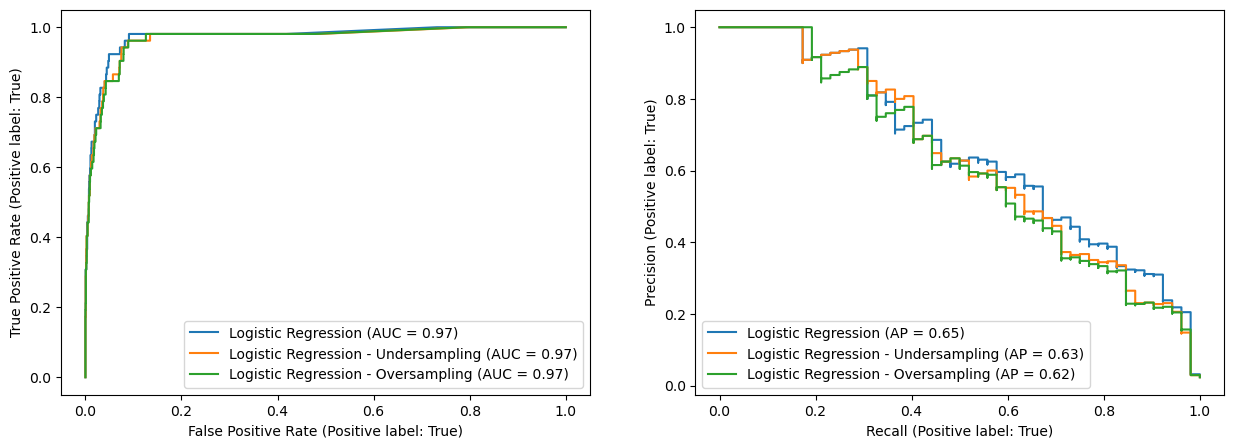

In [44]:
model_1 = LogisticRegression(max_iter=2000).fit(X_dev, y_dev)
y_pred_prob_1 = model_1.predict_proba(X_test)[:,1]

rus = RandomUnderSampler(replacement=False, random_state=42)
model_2 = make_pipeline(rus, LogisticRegression())
model_2.fit(X_dev, y_dev)
y_pred_prob_2 = model_2.predict_proba(X_test)[:,1]

rus = RandomOverSampler()
model_3 = make_pipeline(rus, LogisticRegression())
model_3.fit(X_dev, y_dev)
y_pred_prob_3 = model_3.predict_proba(X_test)[:,1]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))

RocCurveDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[0], 
                                 name="Logistic Regression", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[0], 
                                 name="Logistic Regression - Undersampling", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[0], 
                                 name="Logistic Regression - Oversampling", pos_label=True)


PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[1], 
                                        name="Logistic Regression", pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[1], 
                                        name='Logistic Regression - Undersampling',pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[1], 
                                        name='Logistic Regression - Oversampling',pos_label=True)
plt.show()

# Visualization for Random Forests

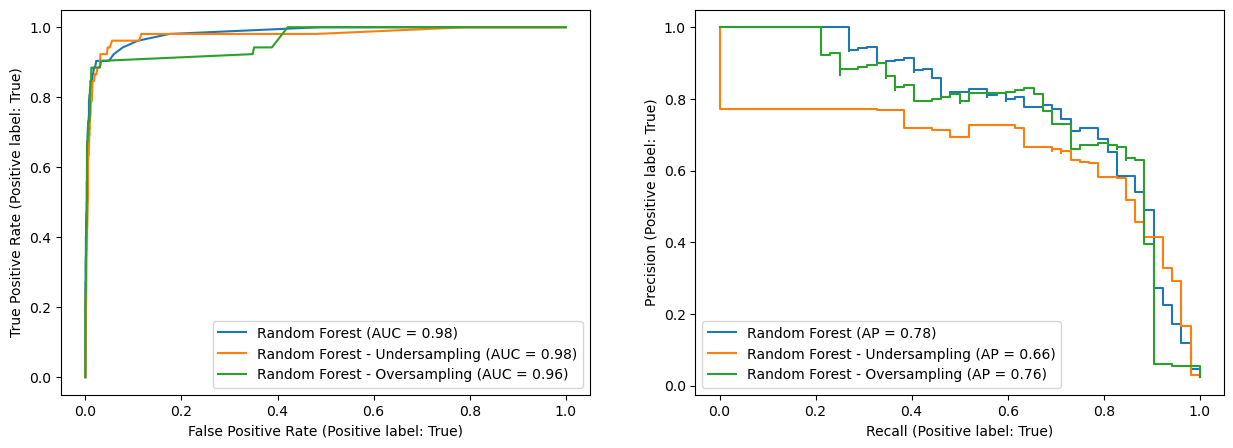

In [45]:
model_1 = RandomForestClassifier().fit(X_dev, y_dev)
y_pred_prob_1 = model_1.predict_proba(X_test)[:,1]

rus = RandomUnderSampler(replacement=False, random_state=42)
model_2 = make_pipeline(rus, RandomForestClassifier())
model_2.fit(X_dev, y_dev)
y_pred_prob_2 = model_2.predict_proba(X_test)[:,1]

rus = RandomOverSampler()
model_3 = make_pipeline(rus, RandomForestClassifier())
model_3.fit(X_dev, y_dev)
y_pred_prob_3 = model_3.predict_proba(X_test)[:,1]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))

RocCurveDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[0], 
                                 name="Random Forest", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[0], 
                                 name="Random Forest - Undersampling", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[0], 
                                 name="Random Forest - Oversampling", pos_label=True)


PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[1], 
                                        name="Random Forest", pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[1], 
                                        name='Random Forest - Undersampling',pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[1], 
                                        name='Random Forest - Oversampling',pos_label=True)
plt.show()

# Ensemble Resampling - Example

In [54]:
rus = RandomUnderSampler(replacement=False, random_state=42)
tree = DecisionTreeClassifier(random_state=42, max_features='sqrt')
uder_sampling_bagging = make_pipeline(rus, BaggingClassifier(estimator=tree, 
                                                             random_state=42))
scores = cross_validate(uder_sampling_bagging, X_dev, y_dev, cv=10, 
                        scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.938411825919198, 0.458717954029249)

In [56]:
tree = DecisionTreeClassifier(random_state=42, max_features='sqrt')
resampled_bagging = BalancedBaggingClassifier(estimator=tree, random_state=42)
scores = cross_validate(resampled_bagging,
                        X_dev, y_dev, cv=10, 
                        scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9418277801119164, 0.5248815292096258)

In [5]:
rus = RandomUnderSampler(replacement=False, random_state=42)
under_sample_rf = make_pipeline(rus, RandomForestClassifier(random_state=42))
scores = cross_validate(under_sample_rf, X_dev, y_dev, cv=10,
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9430329687084388, 0.6189073324753069)

In [7]:
resampled_rf = BalancedBaggingClassifier(random_state=42)
scores = cross_validate(resampled_rf, X_dev, y_dev, cv=10,
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.925462801788824, 0.5112941504269802)

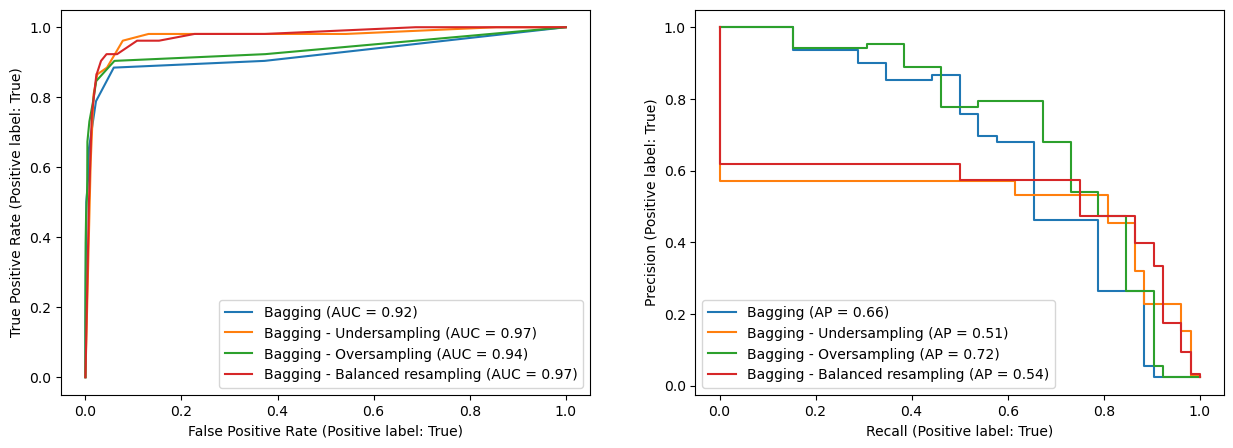

In [11]:
tree = DecisionTreeClassifier(random_state=42, max_features='sqrt')
model_1 = BaggingClassifier(estimator=tree, random_state=42).fit(X_dev, y_dev)
y_pred_prob_1 = model_1.predict_proba(X_test)[:,1]

rus = RandomUnderSampler(replacement=False, random_state=42)
tree = DecisionTreeClassifier(random_state=42, max_features='sqrt')
model_2 = make_pipeline(rus, BaggingClassifier(estimator=tree, 
                                                             random_state=42))
model_2.fit(X_dev, y_dev)
y_pred_prob_2 = model_2.predict_proba(X_test)[:,1]

rus = RandomOverSampler()
tree = DecisionTreeClassifier(random_state=42, max_features='sqrt')
model_3 = make_pipeline(rus, BaggingClassifier(estimator=tree, 
                                                             random_state=42))
model_3.fit(X_dev, y_dev)
y_pred_prob_3 = model_3.predict_proba(X_test)[:,1]

model_4 = BalancedBaggingClassifier(random_state=42)
model_4.fit(X_dev, y_dev)
y_pred_prob_4 = model_4.predict_proba(X_test)[:,1]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))

RocCurveDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[0], 
                                 name="Bagging", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[0], 
                                 name="Bagging - Undersampling", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[0], 
                                 name="Bagging - Oversampling", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_4, ax=ax[0], 
                                 name="Bagging - Balanced resampling", pos_label=True)


PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[1], 
                                        name="Bagging", pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[1], 
                                        name='Bagging - Undersampling',pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[1], 
                                        name='Bagging - Oversampling',pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_4, ax=ax[1], 
                                        name='Bagging - Balanced resampling',pos_label=True)
plt.show()

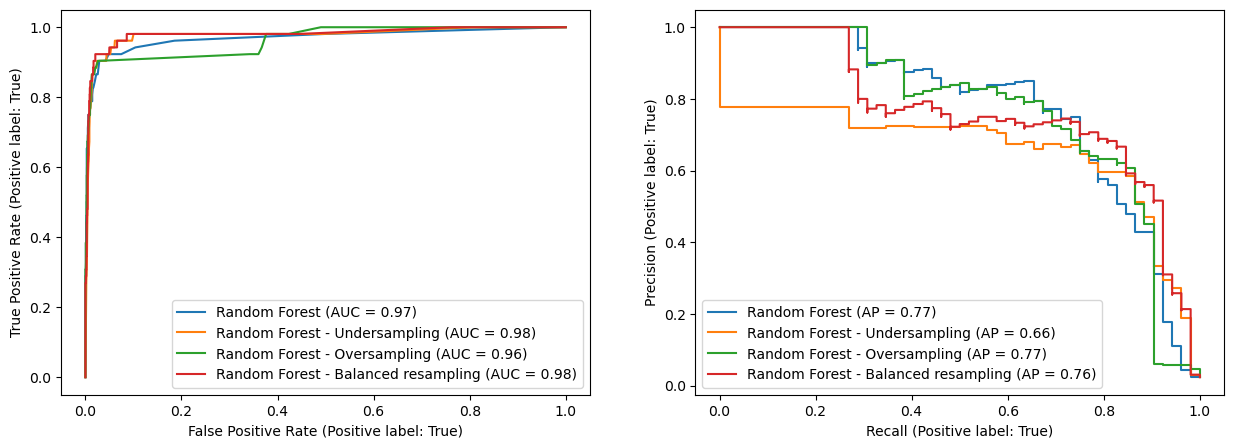

In [12]:
model_1 = RandomForestClassifier().fit(X_dev, y_dev)
y_pred_prob_1 = model_1.predict_proba(X_test)[:,1]

rus = RandomUnderSampler(replacement=False, random_state=42)
model_2 = make_pipeline(rus, RandomForestClassifier())
model_2.fit(X_dev, y_dev)
y_pred_prob_2 = model_2.predict_proba(X_test)[:,1]

rus = RandomOverSampler()
model_3 = make_pipeline(rus, RandomForestClassifier())
model_3.fit(X_dev, y_dev)
y_pred_prob_3 = model_3.predict_proba(X_test)[:,1]

model_4 = BalancedBaggingClassifier(RandomForestClassifier(), random_state=42)
model_4.fit(X_dev, y_dev)
y_pred_prob_4 = model_4.predict_proba(X_test)[:,1]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))

RocCurveDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[0], 
                                 name="Random Forest", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[0], 
                                 name="Random Forest - Undersampling", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[0], 
                                 name="Random Forest - Oversampling", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_4, ax=ax[0], 
                                 name="Random Forest - Balanced resampling", pos_label=True)


PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[1], 
                                        name="Random Forest", pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[1], 
                                        name='Random Forest - Undersampling',pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[1], 
                                        name='Random Forest - Oversampling',pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_4, ax=ax[1], 
                                        name='Random Forest - Balanced resampling',pos_label=True)
plt.show()

# Synthetic Minority Oversampling Technique (SMOTE) - Example

In [9]:
ros = RandomOverSampler(random_state=42)
oversample_rl_pipe = make_pipeline(ros, LogisticRegression())
scores = cross_validate(oversample_rl_pipe, X_dev, y_dev, cv=10, 
                        scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9130371409810945, 0.528769916053271)

In [10]:
smote = SMOTE(random_state=42)
smote_lr_pipe = make_pipeline(smote, LogisticRegression())
scores = cross_validate(oversample_rl_pipe, X_dev, y_dev, cv=10, 
                        scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9130371409810945, 0.528769916053271)

In [11]:
ros = RandomOverSampler(random_state=42)
oversample_rl_pipe = make_pipeline(ros, RandomForestClassifier())
scores = cross_validate(oversample_rl_pipe, X_dev, y_dev, cv=10, 
                        scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9199514227697838, 0.7057786659462155)

In [12]:
smote = SMOTE(random_state=42)
smote_lr_pipe = make_pipeline(smote, RandomForestClassifier())
scores = cross_validate(oversample_rl_pipe, X_dev, y_dev, cv=10, 
                        scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.915030654447514, 0.703207171494225)

In [13]:
smote_lr_pipe.get_params(deep=True)

{'memory': None,
 'steps': [('smote', SMOTE(random_state=42)),
  ('randomforestclassifier', RandomForestClassifier())],
 'verbose': False,
 'smote': SMOTE(random_state=42),
 'randomforestclassifier': RandomForestClassifier(),
 'smote__k_neighbors': 5,
 'smote__n_jobs': None,
 'smote__random_state': 42,
 'smote__sampling_strategy': 'auto',
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__n_estimators': 100,
 'randomforestclassifier__n_jobs': 

<Axes: xlabel='param_smote__k_neighbors'>

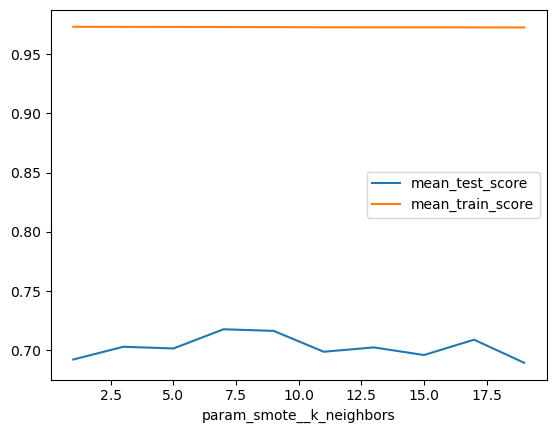

In [16]:
param_grid = {'smote__k_neighbors':np.arange(1, 20, 2)}
gs = GridSearchCV(smote_lr_pipe, param_grid, cv=10, 
                  scoring='average_precision', return_train_score=True)
gs.fit(X_dev, y_dev)
results = pd.DataFrame(gs.cv_results_)
results.plot('param_smote__k_neighbors', ['mean_test_score', 'mean_train_score'])

In [17]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_smote__k_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,3.564369,0.071097,0.018253,0.000777,1,{'smote__k_neighbors': 1},0.795324,0.538121,0.675572,0.816098,...,0.970081,0.970085,0.980026,0.975050,0.975209,0.970274,0.975068,0.970090,0.973098,0.003287
1,3.783215,0.098202,0.019209,0.001860,3,{'smote__k_neighbors': 3},0.807153,0.518607,0.630427,0.816919,...,0.970043,0.970035,0.979969,0.974961,0.975111,0.970182,0.974966,0.970020,0.973033,0.003283
2,3.904873,0.089692,0.018941,0.001077,5,{'smote__k_neighbors': 5},0.786895,0.531254,0.679318,0.822127,...,0.969991,0.969986,0.979840,0.974948,0.975068,0.970173,0.974931,0.970004,0.972986,0.003257
3,3.903362,0.051374,0.018944,0.001094,7,{'smote__k_neighbors': 7},0.791327,0.577765,0.681085,0.815590,...,0.969920,0.969922,0.979804,0.974868,0.975000,0.970120,0.974857,0.969920,0.972921,0.003266
4,3.965323,0.080972,0.020288,0.004628,9,{'smote__k_neighbors': 9},0.790600,0.583192,0.690902,0.830064,...,0.969867,0.969864,0.979696,0.974763,0.974854,0.969989,0.974757,0.969815,0.972824,0.003255


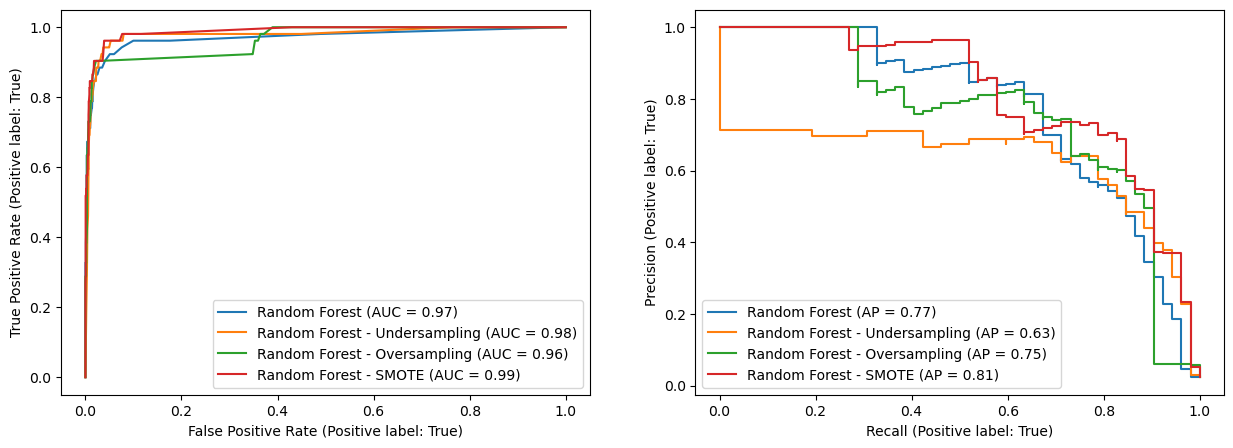

In [19]:
model_1 = RandomForestClassifier().fit(X_dev, y_dev)
y_pred_prob_1 = model_1.predict_proba(X_test)[:,1]

rus = RandomUnderSampler(replacement=False, random_state=42)
model_2 = make_pipeline(rus, RandomForestClassifier())
model_2.fit(X_dev, y_dev)
y_pred_prob_2 = model_2.predict_proba(X_test)[:,1]

rus = RandomOverSampler()
model_3 = make_pipeline(rus, RandomForestClassifier())
model_3.fit(X_dev, y_dev)
y_pred_prob_3 = model_3.predict_proba(X_test)[:,1]

model_4 = model_4 = gs.best_estimator_
y_pred_prob_4 = model_4.predict_proba(X_test)[:,1]

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 5))

RocCurveDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[0], 
                                 name="Random Forest", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[0], 
                                 name="Random Forest - Undersampling", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[0], 
                                 name="Random Forest - Oversampling", pos_label=True)
RocCurveDisplay.from_predictions(y_test, y_pred_prob_4, ax=ax[0], 
                                 name="Random Forest - SMOTE", pos_label=True)


PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_1, ax=ax[1], 
                                        name="Random Forest", pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_2, ax=ax[1], 
                                        name='Random Forest - Undersampling',pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_3, ax=ax[1], 
                                        name='Random Forest - Oversampling',pos_label=True)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob_4, ax=ax[1], 
                                        name='Random Forest - SMOTE',pos_label=True)
plt.show()

# Adding Class Weights - Example

In [20]:
scores = cross_validate(LogisticRegression(), 
                       X_dev, y_dev, cv=10, 
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9047435182719985, 0.6045937994904842)

In [21]:
scores = cross_validate(LogisticRegression(class_weight='balanced'), 
                       X_dev, y_dev, cv=10, 
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.912610152460438, 0.5254696175758357)

In [22]:
scores = cross_validate(RandomForestClassifier(), 
                       X_dev, y_dev, cv=10, 
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.935177306843482, 0.7237160501887361)

In [23]:
scores = cross_validate(RandomForestClassifier(class_weight='balanced'), 
                       X_dev, y_dev, cv=10, 
                       scoring=['roc_auc', 'average_precision'])
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

(0.9074126908922787, 0.6973003982856507)

# Learning with Sparse Data - Example

In [5]:
data = pd.read_csv('./Data/ml-100k/u.data',sep='\t', header=None)
data.columns = ['user_id', 'item_id', 'rating', 'timestamp']
data.drop(labels=['timestamp'], axis=1, inplace=True)
display(data.head())
display(data.shape)

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


(100000, 3)

In [6]:
print(f"# of unique user entries: {len(data['user_id'].unique())}")
print(f"# of unique item entries: {len(data['item_id'].unique())}")
print(f"# of unique item entries: {len(data['user_id'].unique()) + len(data['item_id'].unique())}")
print(f"Ratin distribution:\n{data['rating'].value_counts().sort_index()}")

# of unique user entries: 943
# of unique item entries: 1682
# of unique item entries: 2625
Ratin distribution:
rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: count, dtype: int64


In [7]:
data_processed = pd.get_dummies(data, columns=['user_id','item_id'])
data_processed['rating'] = data_processed['rating'] >= 4
display(data_processed['rating'].value_counts())
display(data_processed.shape)
display(data_processed.head())

rating
True     55375
False    44625
Name: count, dtype: int64

(100000, 2626)

,rating,user_id_1,user_id_2,user_id_3,user_id_4,user_id_5,user_id_6,user_id_7,user_id_8,user_id_9,...,item_id_1673,item_id_1674,item_id_1675,item_id_1676,item_id_1677,item_id_1678,item_id_1679,item_id_1680,item_id_1681,item_id_1682
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Text(0.5, 0, '% populated')

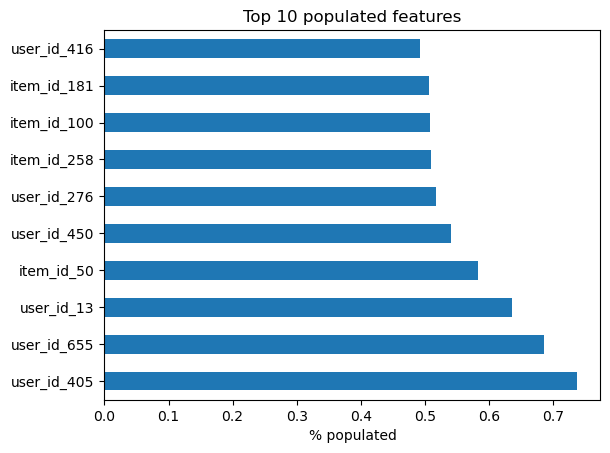

In [11]:
y = data_processed['rating']
X = data_processed.drop(labels=['rating'], axis=1)
spersity = pd.Series(np.count_nonzero(X, axis=0)*100 / X.shape[0], 
          index=X.columns)
spersity_filtered = spersity.sort_values(ascending=False)[:10]
ax = spersity_filtered.plot.barh(title='Top 10 populated features')
ax.set_xlabel('% populated')


In [56]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=2000).fit(X_dev, y_dev)
display(lr_model.score(X_dev, y_dev))
display(lr_model.score(X_test, y_test))

0.73065

0.70835

In [10]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier().fit(X_dev, y_dev)
display(model.score(X_dev, y_dev))
display(model.score(X_test, y_test))

1.0

0.79615

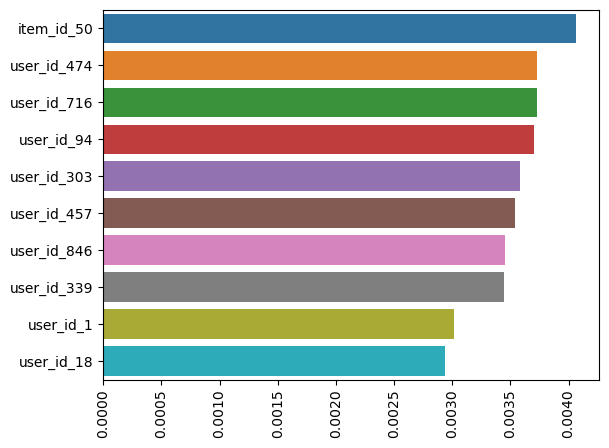

In [11]:
feat_imps = list(zip(X_dev.columns, model.feature_importances_))
feats, imps = zip(*sorted(list(filter(lambda x: x [1] != 0, feat_imps)), key=lambda x: x [1], reverse=True))

ax = sns.barplot(x=list(imps[:10]), y=list(feats[:10]))
ax.tick_params(axis='x', rotation=90)

# Learning with Sparse Data
* Feature selection
* Feature transformation
* Embedded methods

# Learning with Sparse Data - Feature selection

* Sparsity-based feature selection
* Variance-based feature selection
* Univariate feature selection

## Learning with Sparse Data - Sparsity-Based Filtering

In [22]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sparsities = [0.1, 0.2, 0.5, 0.6 , 0.7 ]
dev_scores = []
test_scores = []
n_features = []
for val in sparsities:
    sparsity_filter = spersity >= val
    X_dev_filtered = X_dev[X_dev.columns[sparsity_filter]]
    X_text_filtered = X_test[X_test.columns[sparsity_filter]]
    model = DecisionTreeClassifier().fit(X_dev_filtered, y_dev)
    n_features.append(np.sum(sparsity_filter))
    dev_scores.append(model.score(X_dev_filtered, y_dev))
    test_scores.append(model.score(X_text_filtered, y_test))

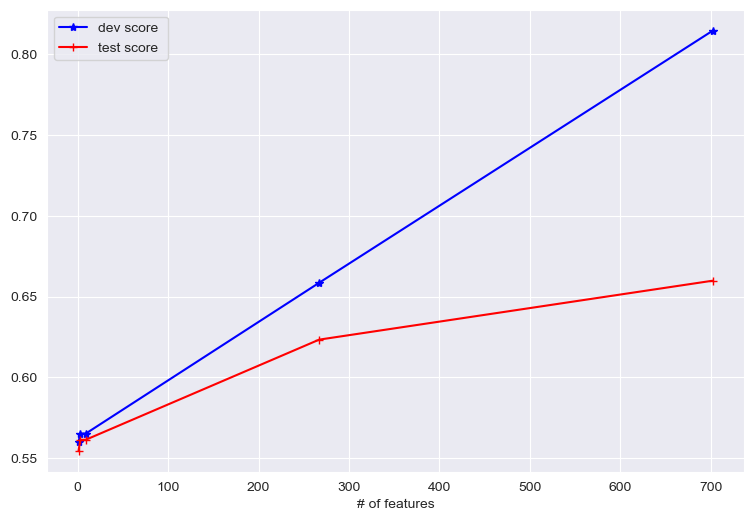

In [23]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(9,6))
plt.plot(n_features, dev_scores, 'b*-', label='dev score')
plt.plot(n_features, test_scores, 'r+-', label='test score ' )
plt.xlabel('# of features')
plt.legend()
plt.show()

## Learning with Sparse Data - Variance-Based Filtering

In [27]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

var_thresholds = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3]
dev_scores = []
test_scores = []
n_features = []

for thresh in var_thresholds:
    pipe = make_pipeline(VarianceThreshold(threshold=thresh), LogisticRegression(max_iter=2000))
    pipe.fit(X_dev, y_dev)
    n_features.append(len(pipe.named_steps['variancethreshold'].get_support(indices=True)))
    dev_scores.append(pipe.score(X_dev, y_dev))
    test_scores.append(pipe.score(X_test, y_test))

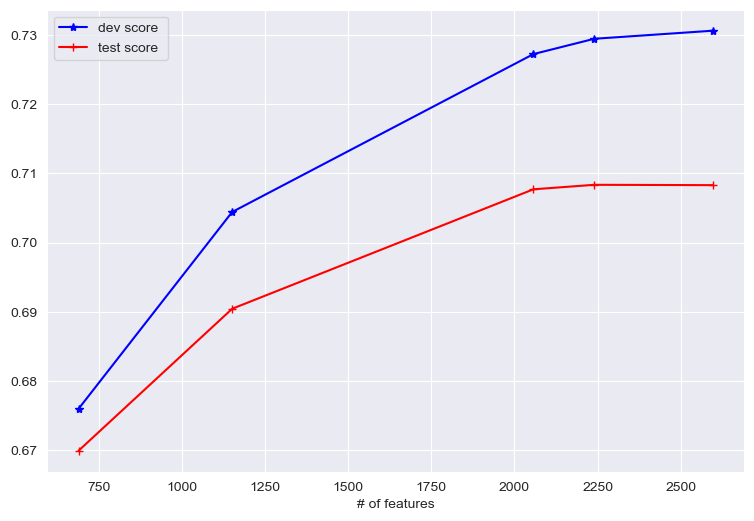

In [28]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(9,6))
plt.plot(n_features, dev_scores, 'b*-', label='dev score')
plt.plot(n_features, test_scores, 'r+-', label='test score ' )
plt.xlabel('# of features')
plt.legend()
plt.show()

## Learning with Sparse Data - Univariate Feature Selection

In [18]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_features = [5, 20 , 100 , 500 , 1000 , 1500, 2000]
dev_scores = []
test_scores = []
for features in n_features:
    pipe = make_pipeline(SelectKBest(chi2, k=features), LogisticRegression(max_iter=2000))
    pipe.fit(X_dev, y_dev)
    dev_scores.append(pipe.score(X_dev, y_dev))
    test_scores.append(pipe.score(X_test, y_test))

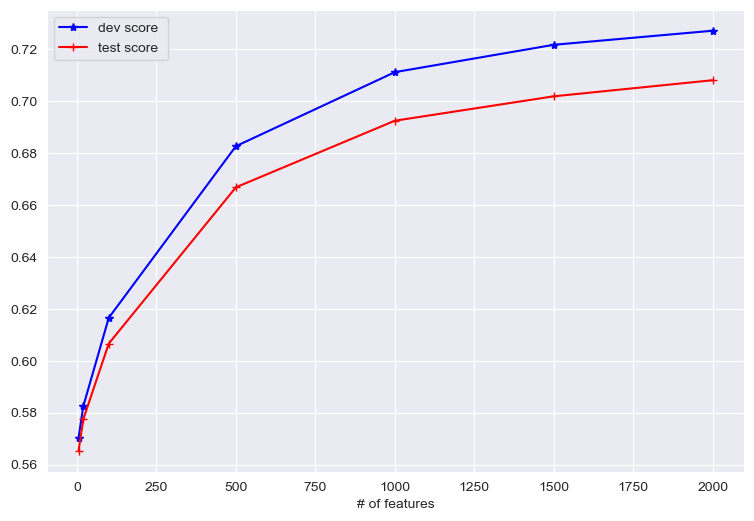

In [20]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(9,6))
plt.plot(n_features, dev_scores, 'b*-', label='dev score')
plt.plot(n_features, test_scores, 'r+-', label='test score ' )
plt.xlabel('# of features')
plt.legend()
plt.show()

# Learning with Sparse Data - Feature Transformation

## Learning with Sparse Data - Principal Component Analysis

In [24]:
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_dev_transformed = scaler.fit_transform(X_dev)
X_test_transformed = scaler.fit_transform(X_test)

n_pc = [10, 20, 50, 100, 500, 1000]
dev_scores = []
test_scores = []
for pc in n_pc:
    pipe = make_pipeline(PCA(n_components=pc), LogisticRegression(max_iter=2000))
    pipe.fit(X_dev_transformed, y_dev)
    dev_scores.append(pipe.score(X_dev_transformed, y_dev))
    test_scores.append(pipe.score(X_test_transformed, y_test))    

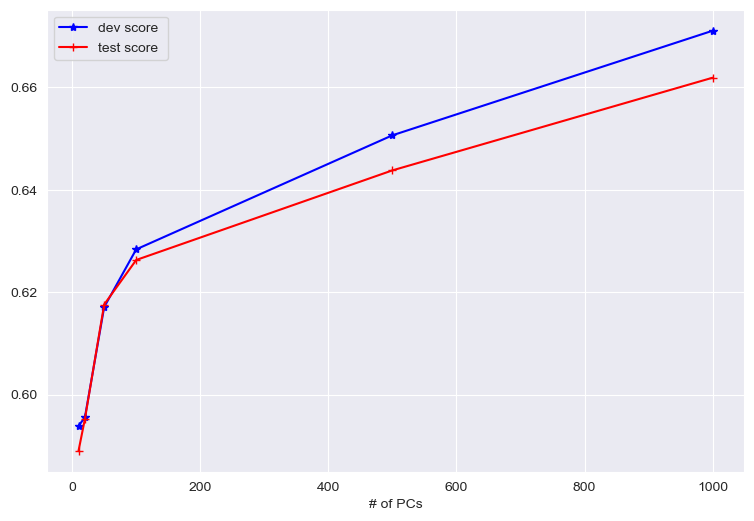

In [25]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(9,6))
plt.plot(n_pc, dev_scores, 'b*-', label='dev score')
plt.plot(n_pc, test_scores, 'r+-', label='test score ' )
plt.xlabel('# of PCs')
plt.legend()
plt.show()

Text(0, 0.5, '% of variance explained')

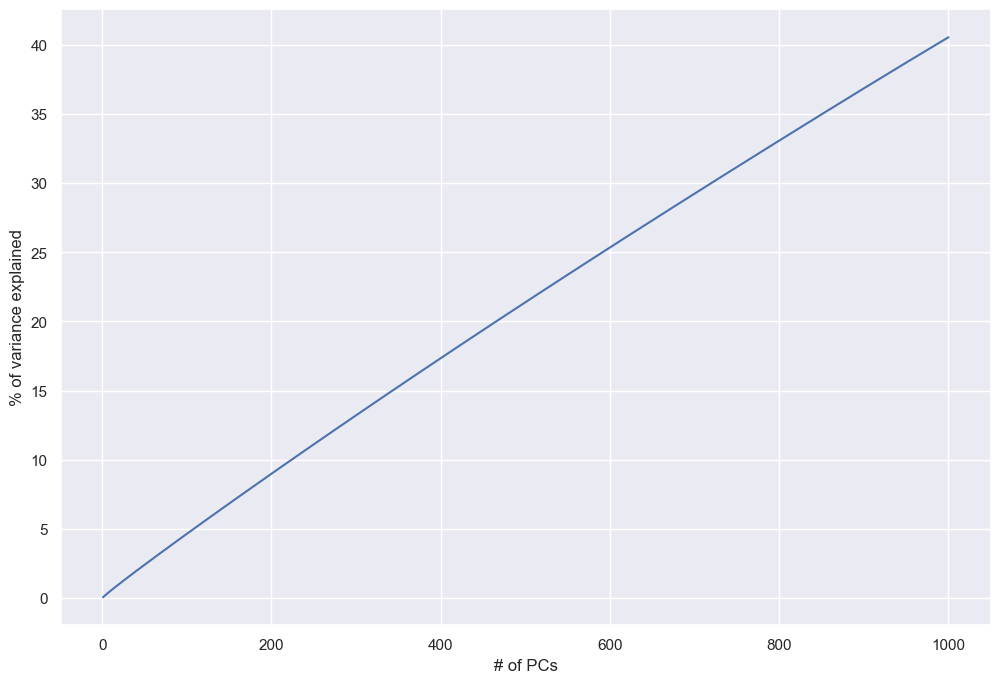

In [27]:
pca = PCA(n_components=1000)
X_dev_pc = pca.fit_transform(X_dev_transformed)
sns.set()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(np.arange(1, 1001), pca.explained_variance_ratio_.cumsum()*100)
plt.xlabel('# of PCs')
plt.ylabel('% of variance explained')
plt.show()

## Learning with Sparse Data - Feature Hashing

In [14]:
X = data.drop(["rating"] ,axis=1)
X_prep = list(map(lambda x: dict(zip([str(y) for y in x], [1 , 1])), X.values.tolist()))

X_prep[:5]

[{'196': 1, '242': 1},
 {'186': 1, '302': 1},
 {'22': 1, '377': 1},
 {'244': 1, '51': 1},
 {'166': 1, '346': 1}]

In [15]:
fh = FeatureHasher(n_features=10, alternate_sign=True)

X_hashed = fh.transform(X_prep)
y = data['rating']

X_hashed.todense()

matrix([[-1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  1.],
        [ 0., -1.,  0., ...,  0., -1.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  1.],
        [-1.,  0.,  0., ..., -1.,  0.,  0.]])

In [16]:
X_dev, X_test, y_dev, y_test = train_test_split(X_hashed, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression(max_iter=2000)
lr_model.fit(X_dev, y_dev)
display(lr_model.score(X_dev, y_dev))
display(lr_model.score(X_test, y_test))

0.342275

0.3396

In [18]:
n_features = [16, 32, 64, 128, 256, 512]
dev_scores = []
test_scores = []
for features in n_features:
    fh = FeatureHasher(n_features=features, alternate_sign=False)
    X_hashed = fh.transform(X_prep)    
    X_dev, X_test, y_dev, y_test = train_test_split(X_hashed, y, 
                                                    test_size=0.2, random_state=42)    
    pipe = make_pipeline(SelectKBest(chi2, k=features), LogisticRegression(max_iter=2000))
    pipe.fit(X_dev, y_dev)
    dev_scores.append(pipe.score(X_dev, y_dev))
    test_scores.append(pipe.score(X_test, y_test))

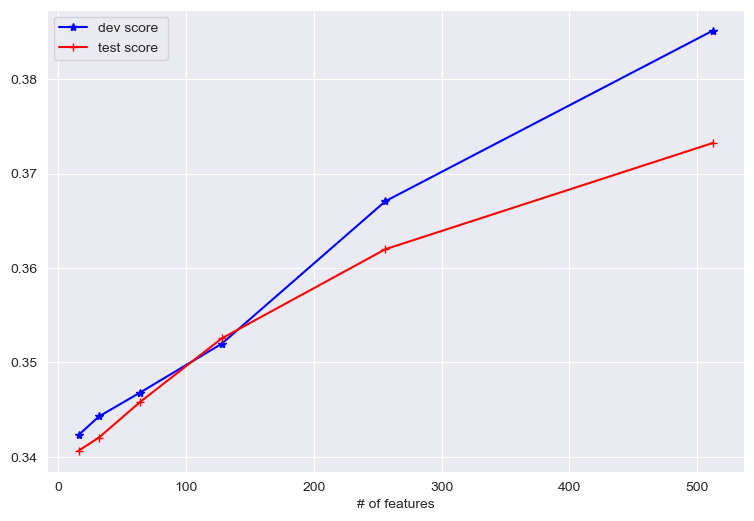

In [19]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(9,6))
plt.plot(n_features, dev_scores, 'b*-', label='dev score')
plt.plot(n_features, test_scores, 'r+-', label='test score ' )
plt.xlabel('# of features')
plt.legend()
plt.show()

# Learning with Sparse Data - Embedded methods

## Learning with Sparse Data - Lasso Logistic Regression

In [45]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
dev_scores = []
test_scores = []
n_features = []
for C in C_values:
    lr_model = LogisticRegression(C=C, penalty='l1', solver='liblinear')
    lr_model.fit(X_dev, y_dev)
    n_features.append(np.count_nonzero(lr_model.coef_))
    dev_scores.append(lr_model.score(X_dev, y_dev))
    test_scores.append(lr_model.score(X_test, y_test))

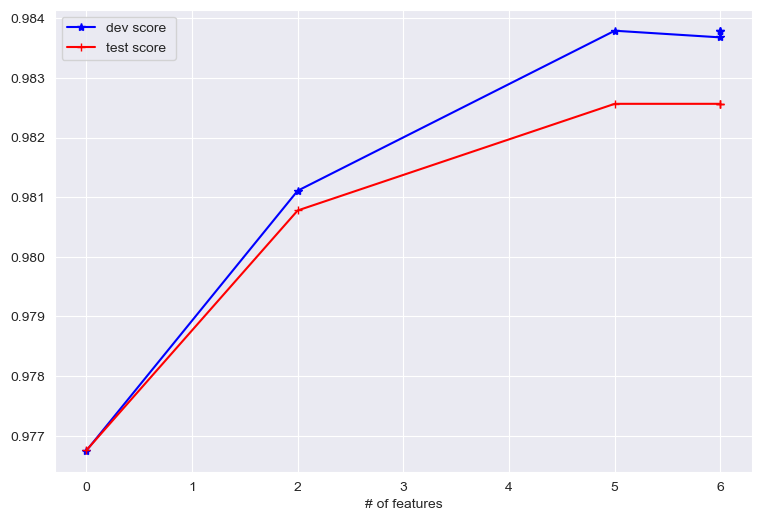

In [46]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(9,6))
plt.plot(n_features, dev_scores, 'b*-', label='dev score')
plt.plot(n_features, test_scores, 'r+-', label='test score ' )
plt.xlabel('# of features')
plt.legend()
plt.show()

## Learning with Sparse Data - Lasso SVMs

In [51]:

C_values = [0.001, 0.01, 0.1, 1, 10, 100]
dev_scores = []
test_scores = []
n_features = []
for C in C_values:
    svc_model = LinearSVC(C=C, penalty='l1', dual=False, max_iter=3000)
    svc_model.fit(X_dev, y_dev)
    n_features.append(np.count_nonzero(svc_model.coef_))
    dev_scores.append(svc_model.score(X_dev, y_dev))
    test_scores.append(svc_model.score(X_test, y_test))

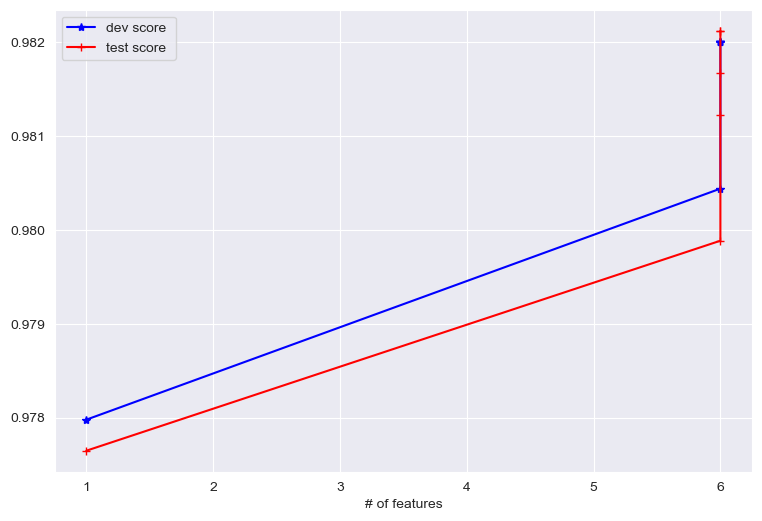

In [52]:
sns.set_style('darkgrid')
fig,ax = plt.subplots(1,1,figsize=(9,6))
plt.plot(n_features, dev_scores, 'b*-', label='dev score')
plt.plot(n_features, test_scores, 'r+-', label='test score ' )
plt.xlabel('# of features')
plt.legend()
plt.show()